## Import Libraries

In [81]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plot
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import datetime
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Data Exploration and Cleaning

In [ ]:
df = pd.read_excel (r'trandataset.xlsx')

In [95]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [96]:
df.shape

(12043, 23)

### Heat map shows missing values in dataset (Yellow fields are missing)

<AxesSubplot:>

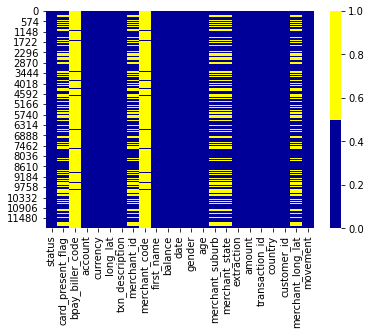

In [97]:
cols = df.columns[:23] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

### Find percentage of missing values for each field

In [98]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


status - 0%
card_present_flag - 36%
bpay_biller_code - 93%
account - 0%
currency - 0%
long_lat - 0%
txn_description - 0%
merchant_id - 36%
merchant_code - 93%
first_name - 0%
balance - 0%
date - 0%
gender - 0%
age - 0%
merchant_suburb - 36%
merchant_state - 36%
extraction - 0%
amount - 0%
transaction_id - 0%
country - 0%
customer_id - 0%
merchant_long_lat - 36%
movement - 0%


created missing indicator for: card_present_flag
created missing indicator for: bpay_biller_code
created missing indicator for: merchant_id
created missing indicator for: merchant_code
created missing indicator for: merchant_suburb
created missing indicator for: merchant_state
created missing indicator for: merchant_long_lat


<AxesSubplot:xlabel='index'>

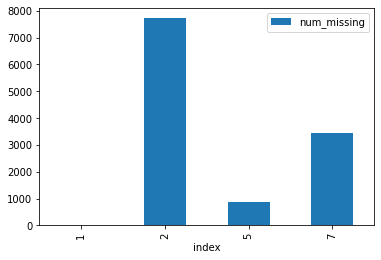

In [99]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


### Dropping columns which has more than 40% missing values 

In [60]:
df=df.drop(columns =['bpay_biller_code', 'merchant_code'])

In [61]:
df.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement', 'long', 'lat', 'geometry', 'year',
       'month'],
      dtype='object')

In [3]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [103]:
df[df['card_present_flag'].isnull()]

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_long_lat,movement,card_present_flag_ismissing,bpay_biller_code_ismissing,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing
5,posted,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,Robert,1705.43,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
9,posted,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,Michael,466.58,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
10,posted,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,Fernando,4348.50,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
11,posted,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,Kristin,1203.75,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
13,posted,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,Isaiah,4438.16,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,ACC-2173390920,AUD,144.71 -37.58,PHONE BANK,NaN,Luis,13537.75,2018-10-31,...,NaN,debit,True,True,True,True,True,True,True,7
12032,posted,NaN,ACC-1710017148,AUD,150.82 -34.01,PAYMENT,NaN,Michelle,20699.90,2018-10-31,...,NaN,debit,True,True,True,True,True,True,True,7
12035,posted,NaN,ACC-1973887809,AUD,115.78 -31.90,PAYMENT,NaN,Antonio,9349.51,2018-10-31,...,NaN,debit,True,True,True,True,True,True,True,7
12036,posted,NaN,ACC-1349834573,AUD,145.17 -37.84,PAYMENT,NaN,Matthew,18127.50,2018-10-31,...,NaN,debit,True,True,True,True,True,True,True,7


In [62]:
df['currency'].unique()

array(['AUD'], dtype=object)

In [63]:
df[['long','lat']] = pd.DataFrame(df.long_lat.str.split(' ',1).tolist(),
                                 columns = ['long','lat'])

In [64]:
BBox = ((df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max()))

In [65]:
BBox

('114.62', '255.00', '-12.37', '-573.00')

### Scatter Plot used to identify outliers in the dataset

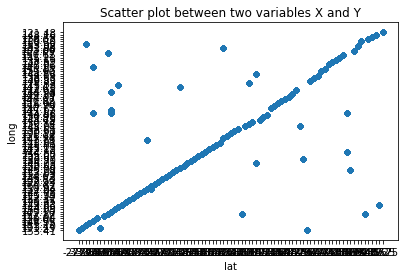

In [66]:
df.plot.scatter(x='lat', y='long', title= "Scatter plot between two variables X and Y");

plot.show(block=True);


In [15]:
df['long'].dtypes

dtype('O')

In [16]:
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

<AxesSubplot:xlabel='lat'>

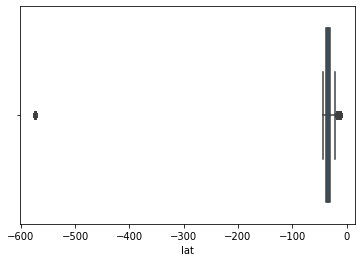

In [17]:
sns.boxplot(x=df['lat'])

<AxesSubplot:xlabel='long'>

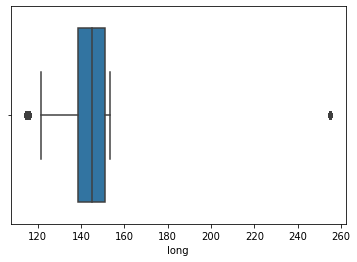

In [18]:
sns.boxplot(x=df['long'])

In [19]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount,long,lat
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588,143.648563,-38.164347
std,0.398029,0.0,31503.722652,10.046343,592.599934,16.669352,54.622791
min,0.000000,0.0,0.240000,18.000000,0.100000,114.620000,-573.000000
25%,1.000000,0.0,3158.585000,22.000000,16.000000,138.690000,-37.700000
50%,1.000000,0.0,6432.010000,28.000000,29.000000,145.230000,-33.890000
75%,1.000000,0.0,12465.945000,38.000000,53.655000,151.220000,-30.750000
max,1.000000,0.0,267128.520000,78.000000,8835.980000,255.000000,-12.370000


In [20]:
df['lat'].describe()

count    12043.000000
mean       -38.164347
std         54.622791
min       -573.000000
25%        -37.700000
50%        -33.890000
75%        -30.750000
max        -12.370000
Name: lat, dtype: float64

In [141]:
z = np.abs(stats.zscore(df['lat']))
print(z)

0        0.187006
1        0.187006
2        0.077340
3        0.192315
4        0.187006
           ...   
12038    0.159177
12039    0.078621
12040    0.078255
12041    0.007403
12042    0.080452
Name: lat, Length: 12043, dtype: float64


In [142]:
threshold = 3
print(np.where(z > 3))

(array([   47,    51,    99,   392,   473,   477,   500,   531,   549,
         550,   618,   622,   625,   630,   631,   633,   847,   875,
         936,   979,  1666,  1707,  1776,  1882,  1960,  2034,  2096,
        2103,  2130,  2152,  2561,  2672,  2763,  2794,  3218,  3220,
        3235,  3241,  3300,  3461,  3480,  3494,  3502,  3512,  3549,
        3608,  3884,  3981,  4076,  4078,  4133,  4139,  4146,  4167,
        4238,  4311,  4312,  4315,  4320,  4439,  4449,  4465,  4466,
        4551,  4565,  4568,  4570,  4762,  4819,  4827,  4939,  4944,
        5364,  5476,  5516,  5526,  5546,  5678,  5709,  5720,  5773,
        5861,  5867,  6015,  6222,  6308,  6309,  6348,  6389,  6397,
        6423,  7234,  7344,  7652,  7883,  7925,  7929,  7989,  7991,
        7998,  8053,  8064,  8181,  8247,  8303,  8349,  8371,  8390,
        8416,  8799,  8821,  8943,  9109,  9218,  9507,  9703, 10045,
       10164, 10983, 11094, 11377, 11900, 12002]),)


In [150]:
print(z[:]>3)

0        False
1        False
2        False
3        False
4        False
         ...  
12038    False
12039    False
12040    False
12041    False
12042    False
Name: lat, Length: 12043, dtype: bool


In [155]:
BBox = ((df.long.min(),df.long.max(),df.lat.min(), df.lat.max()))

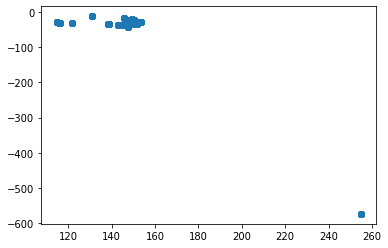

In [21]:
plt.scatter(x=df['long'], y=df['lat'])

In [22]:
df['long'].describe()

count    12043.000000
mean       143.648563
std         16.669352
min        114.620000
25%        138.690000
50%        145.230000
75%        151.220000
max        255.000000
Name: long, dtype: float64

### Geometry plot shows lat long of transactions
*As seen, all the transactions happen in Australia*

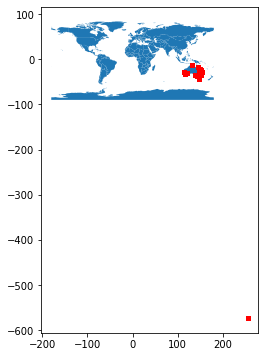

In [23]:
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [166]:
df.iloc[:,:10]

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01
...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31
12039,authorized,1.0,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31
12040,authorized,1.0,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31
12041,authorized,1.0,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31


In [164]:
df.iloc[:,10:]

,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,...,card_present_flag_ismissing,bpay_biller_code_ismissing,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat
0,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,...,False,True,False,True,False,False,False,2,153.41,-27.95
1,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,...,False,True,False,True,False,False,False,2,153.41,-27.95
2,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,...,False,True,False,True,False,False,False,2,151.23,-33.94
3,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,...,False,True,False,True,False,False,False,2,153.10,-27.66
4,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,...,False,True,False,True,False,False,False,2,153.41,-27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,...,False,True,False,True,False,False,False,2,149.83,-29.47
12039,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,...,False,True,False,True,False,False,False,2,151.22,-33.87
12040,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,...,False,True,False,True,False,False,False,2,151.12,-33.89
12041,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,...,False,True,False,True,False,False,False,2,144.96,-37.76


In [169]:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

<AxesSubplot:>

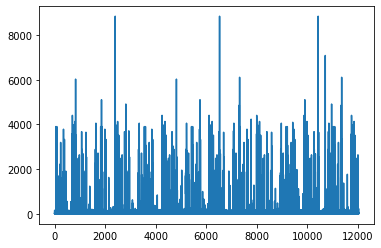

In [170]:
df['amount'].plot()

In [31]:
low_bal=df.loc[df['balance'] < 20]

In [184]:
df.loc[df['long'] == 255.000000]

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat,equal,geometry
47,authorized,0.0,ACC-2901672282,AUD,255.00 -573.00,SALES-POS,7ce5471b-363c-46ab-b398-ca517347829a,Daniel,1290.08,2018-08-01,...,False,True,False,False,False,2,255.0,-573.0,False,POINT (255.000 -573.000)
51,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,1195.08,2018-08-01,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)
99,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,1162.08,2018-08-01,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)
392,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,Daniel,4490.85,2018-08-03,...,True,False,True,True,True,5,255.0,-573.0,False,POINT (255.000 -573.000)
473,authorized,1.0,ACC-2901672282,AUD,255.00 -573.00,POS,ac9555e4-9c7c-486b-9e65-07e2e918dd0b,Daniel,4473.55,2018-08-04,...,False,True,False,False,False,2,255.0,-573.0,False,POINT (255.000 -573.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,11568.46,2018-10-23,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)
11094,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,11535.46,2018-10-24,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)
11377,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,Daniel,14864.23,2018-10-26,...,True,False,True,True,True,5,255.0,-573.0,False,POINT (255.000 -573.000)
11900,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,14824.23,2018-10-30,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)


In [29]:
df.loc[df['lat'] < -90]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,geometry
47,authorized,0.0,NaN,ACC-2901672282,AUD,255.00 -573.00,SALES-POS,7ce5471b-363c-46ab-b398-ca517347829a,NaN,Daniel,...,2018-08-01T10:27:08.000+0000,31.62,826f09d26daf4b7282f597cabfecaf81,Australia,CUS-1617121891,151.21 -33.87,debit,255.0,-573.0,POINT (255.000 -573.000)
51,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-08-01T11:00:00.000+0000,95.00,62e49c215d7e45609556936fd7e860ce,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)
99,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-08-01T17:00:00.000+0000,33.00,c539e04478c94bb2b48af6e0069a011b,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)
392,posted,NaN,0,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,0.0,Daniel,...,2018-08-03T17:00:00.000+0000,3328.77,035f7e013df6486f80e2245bea04a28f,Australia,CUS-1617121891,NaN,credit,255.0,-573.0,POINT (255.000 -573.000)
473,authorized,1.0,NaN,ACC-2901672282,AUD,255.00 -573.00,POS,ac9555e4-9c7c-486b-9e65-07e2e918dd0b,NaN,Daniel,...,2018-08-04T09:25:56.000+0000,17.30,9467d030d2b84b4dbc419e8230fd9361,Australia,CUS-1617121891,145.09 -37.9,debit,255.0,-573.0,POINT (255.000 -573.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-10-23T23:00:00.000+0000,40.00,a89ff25555584da79787436589b93eac,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)
11094,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-10-24T17:00:00.000+0000,33.00,64733ce8979142feaaf6733e5fba2c39,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)
11377,posted,NaN,0,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,0.0,Daniel,...,2018-10-26T17:00:00.000+0000,3328.77,a3720984d89f441c93a62bbe12508eb1,Australia,CUS-1617121891,NaN,credit,255.0,-573.0,POINT (255.000 -573.000)
11900,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-10-30T23:00:00.000+0000,40.00,911f3f57e72b4cc9a0af0eed117ed262,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)


In [27]:
df.loc[df['long'] > 180]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat,geometry
47,authorized,0.0,NaN,ACC-2901672282,AUD,255.00 -573.00,SALES-POS,7ce5471b-363c-46ab-b398-ca517347829a,NaN,Daniel,...,2018-08-01T10:27:08.000+0000,31.62,826f09d26daf4b7282f597cabfecaf81,Australia,CUS-1617121891,151.21 -33.87,debit,255.0,-573.0,POINT (255.000 -573.000)
51,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-08-01T11:00:00.000+0000,95.00,62e49c215d7e45609556936fd7e860ce,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)
99,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-08-01T17:00:00.000+0000,33.00,c539e04478c94bb2b48af6e0069a011b,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)
392,posted,NaN,0,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,0.0,Daniel,...,2018-08-03T17:00:00.000+0000,3328.77,035f7e013df6486f80e2245bea04a28f,Australia,CUS-1617121891,NaN,credit,255.0,-573.0,POINT (255.000 -573.000)
473,authorized,1.0,NaN,ACC-2901672282,AUD,255.00 -573.00,POS,ac9555e4-9c7c-486b-9e65-07e2e918dd0b,NaN,Daniel,...,2018-08-04T09:25:56.000+0000,17.30,9467d030d2b84b4dbc419e8230fd9361,Australia,CUS-1617121891,145.09 -37.9,debit,255.0,-573.0,POINT (255.000 -573.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-10-23T23:00:00.000+0000,40.00,a89ff25555584da79787436589b93eac,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)
11094,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-10-24T17:00:00.000+0000,33.00,64733ce8979142feaaf6733e5fba2c39,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)
11377,posted,NaN,0,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,0.0,Daniel,...,2018-10-26T17:00:00.000+0000,3328.77,a3720984d89f441c93a62bbe12508eb1,Australia,CUS-1617121891,NaN,credit,255.0,-573.0,POINT (255.000 -573.000)
11900,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,...,2018-10-30T23:00:00.000+0000,40.00,911f3f57e72b4cc9a0af0eed117ed262,Australia,CUS-1617121891,NaN,debit,255.0,-573.0,POINT (255.000 -573.000)


In [35]:
df['date'].head()

0   2018-08-01
1   2018-08-01
2   2018-08-01
3   2018-08-01
4   2018-08-01
Name: date, dtype: datetime64[ns]

In [36]:
df['year'] = df['date'].dt.year

In [37]:
df['month'] = df['date'].dt.month

In [38]:
df['month'].head()

0    8
1    8
2    8
3    8
4    8
Name: month, dtype: int64

In [39]:
df['month'].unique

<bound method Series.unique of 0         8
1         8
2         8
3         8
4         8
         ..
12038    10
12039    10
12040    10
12041    10
12042    10
Name: month, Length: 12043, dtype: int64>

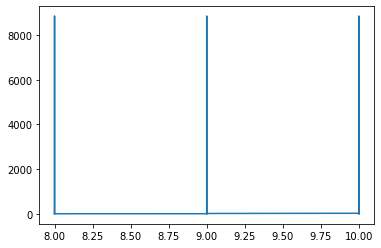

In [41]:
plt.plot(df['month'],df['amount'])
plt.show()

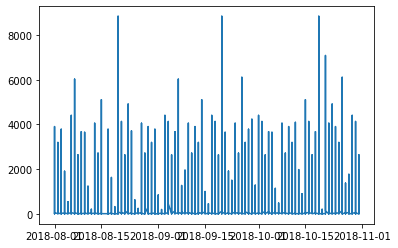

In [40]:
plt.plot(df['date'],df['amount'])
plt.show()

In [46]:
plot_kwargs={'xticks':range(2000,2025),
 'yticks':(0,2000,4000,6000,8000),
 'grid':True,
 'fontsize':12}

In [216]:
df.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat,equal,geometry,year
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,True,False,False,False,2,153.41,-27.95,False,POINT (153.41000 -27.95000),2018
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,True,False,False,False,2,153.41,-27.95,False,POINT (153.41000 -27.95000),2018
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,True,False,False,False,2,151.23,-33.94,True,POINT (151.23000 -33.94000),2018
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,True,False,False,False,2,153.10,-27.66,False,POINT (153.10000 -27.66000),2018
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,True,False,False,False,2,153.41,-27.95,False,POINT (153.41000 -27.95000),2018


In [218]:
df['year'].unique()

array([2018])

In [217]:
df.groupby('year').agg('mean')

,card_present_flag,balance,age,amount,card_present_flag_ismissing,bpay_biller_code_ismissing,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat,equal
year,,,,,,,,,,,,,,,
2018,0.802644,14704.195553,30.58233,187.933588,0.359213,0.926513,0.359213,0.926679,0.359213,0.359213,0.359213,3.649257,143.648563,-38.164347,0.004235


<AxesSubplot:xlabel='month'>

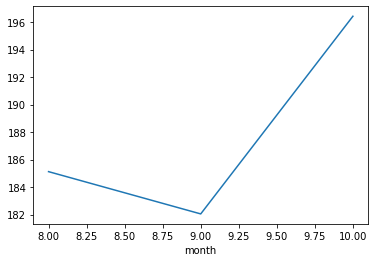

In [47]:
df.groupby(['month'])['amount'].mean().plot(kind='line')


In [68]:
months = []
for date in df["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

df["Months"] = months
df["Months"].head()

0    August
1    August
2    August
3    August
4    August
Name: Months, dtype: object

In [69]:
df_cus_aug = df[df["Months"] == "August"].groupby("customer_id").mean()
df_gen_aug = df[df["Months"] == "August"].groupby("gender").mean()

In [70]:
mean_f_bal_aug = df_gen_aug["balance"].iloc[0]
mean_m_bal_aug = df_gen_aug["balance"].iloc[1]
n_points = len(df_cus_aug["age"])

### Relation between balance and age of customer
##### Shows mean balance for male and female

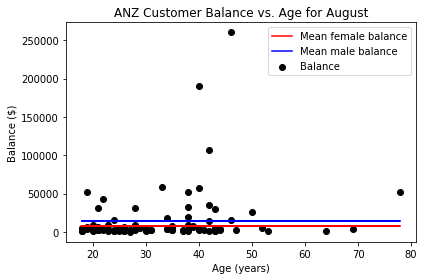

In [71]:
plt.figure()
plt.scatter(df_cus_aug["age"], df_cus_aug["balance"], c="black", label="Balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [72]:
mean_f_amt_aug = df_gen_aug["amount"].iloc[0]
mean_m_amt_aug = df_gen_aug["amount"].iloc[1]

### Graph to show average transaction amount by age for August

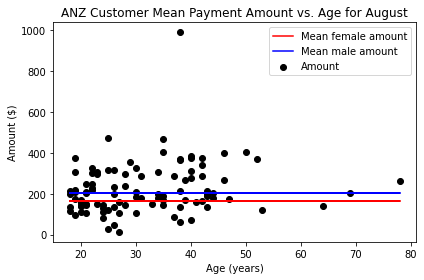

In [73]:
plt.scatter(df_cus_aug["age"], df_cus_aug["amount"], c="black", label="Amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_amt_aug,mean_f_amt_aug,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_amt_aug,mean_m_amt_aug,n_points), c="b", label = "Mean male amount")
plt.title("Customer Mean Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

## MODELLING

### Correlation Matrix to show relationship between variables

/home/darkseid/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/darkseid/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 2018.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/darkseid/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/darkseid/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundarie

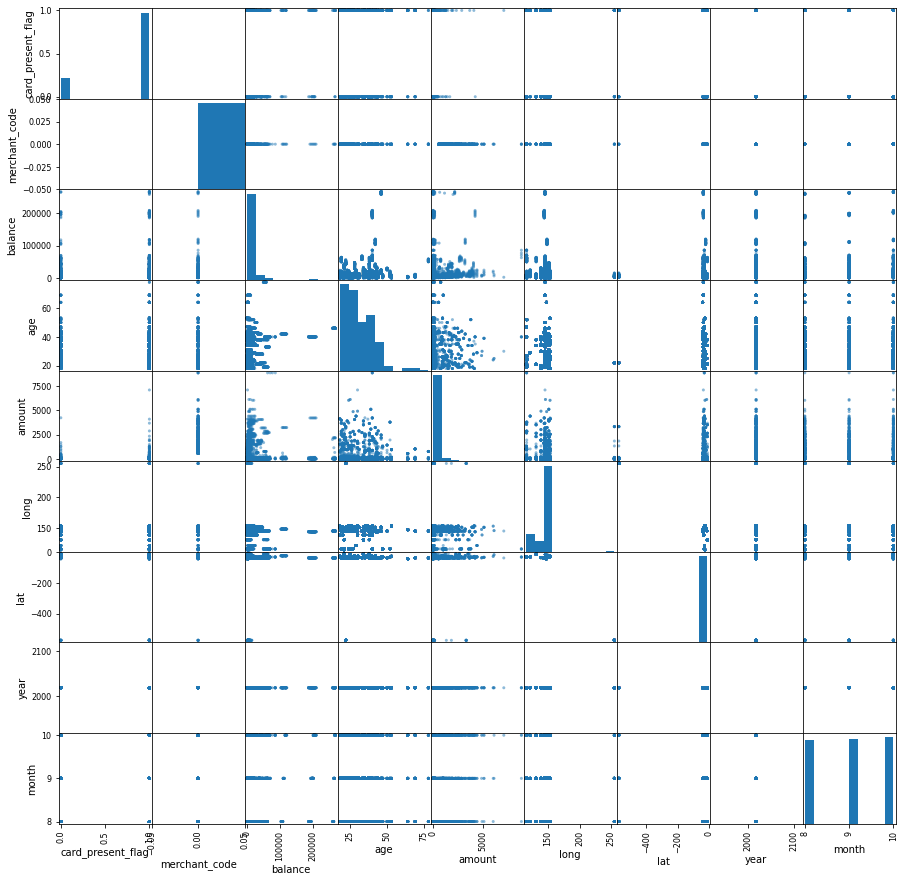

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15, 15))
plt.show()

In [57]:
df.corr()

,card_present_flag,merchant_code,balance,age,amount,long,lat,year,month
card_present_flag,1.000000,NaN,0.005925,-0.008405,-0.002074,-0.008446,0.000340,NaN,-0.001568
merchant_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.199329,0.059178,-0.022436,0.014786,NaN,0.099208
age,-0.008405,NaN,0.199329,1.000000,0.029980,0.031728,0.068866,NaN,0.009923
amount,-0.002074,NaN,0.059178,0.029980,1.000000,-0.000677,-0.015175,NaN,0.007860
long,-0.008446,NaN,-0.022436,0.031728,-0.000677,1.000000,-0.682094,NaN,-0.002685
lat,0.000340,NaN,0.014786,0.068866,-0.015175,-0.682094,1.000000,NaN,0.021414
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.001568,NaN,0.099208,0.009923,0.007860,-0.002685,0.021414,NaN,1.000000


### Calculate average salary of customers

In [74]:
salaries = (df[df['txn_description'] == 'PAY/SALARY'].groupby('customer_id').agg('sum')[['amount']]*4).reset_index()
salaries = pd.merge(salaries, df[['customer_id', 'age', 'gender','balance']].drop_duplicates(), how='inner',  on='customer_id')

In [75]:
salaries

,customer_id,amount,age,gender,balance
0,CUS-1005756958,50464.44,53,F,463.96
1,CUS-1005756958,50464.44,53,F,424.01
2,CUS-1005756958,50464.44,53,F,401.05
3,CUS-1005756958,50464.44,53,F,391.94
4,CUS-1005756958,50464.44,53,F,377.29
...,...,...,...,...,...
12035,CUS-883482547,111368.88,19,F,16835.50
12036,CUS-883482547,111368.88,19,F,20812.96
12037,CUS-883482547,111368.88,19,F,20786.90
12038,CUS-883482547,111368.88,19,F,20732.90


In [84]:
df_cus = df.groupby("customer_id").mean()
df_cus.head()

,card_present_flag,balance,age,amount,year,month
customer_id,,,,,,
CUS-1005756958,0.812500,2275.852055,53.0,222.862603,2018.0,8.438356
CUS-1117979751,0.826923,9829.929000,21.0,339.843700,2018.0,8.890000
CUS-1140341822,0.815385,5699.212250,28.0,212.632500,2018.0,9.350000
CUS-1147642491,0.750000,9032.841186,34.0,245.600169,2018.0,9.177966
CUS-1196156254,0.785276,22272.433755,34.0,147.145796,2018.0,8.930612


### Split data into training and test data

In [86]:
N_train = int(len(df_cus)*0.8)
X_train = df_cus.drop("amount", axis=1).iloc[:N_train]
Y_train = df_cus["amount"].iloc[:N_train]
X_test = df_cus.drop("amount", axis=1).iloc[N_train:]
Y_test = df_cus["amount"].iloc[N_train:]

In [87]:
linear_reg = LinearRegression()

In [88]:
linear_reg.fit(X_train, Y_train)
linear_reg.score(X_train, Y_train)

0.11341215477712174

In [89]:
linear_reg.predict(X_test)

array([248.40554071, 223.64682098, 223.37695773, 241.37010499,
       238.33754095, 212.45038083, 211.02835131, 328.94508444,
       224.13070983, 229.41639265, 218.20492861, 380.5472736 ,
       220.05659868, 240.4460363 , 208.5117713 , 205.20498652,
       230.68091712, 218.02329829, 209.81751614, 223.34184901])

### The R^2 score of the linear regression between age and annual salary

In [94]:
linear_reg.score(X_test, Y_test)

0.2024167812043709